# Unidad Práctica 6: Texto en Tablas

Por **Eduardo Graells-Garrido**. <egraells@udd.cl>. 

Actualizado: **9 de octubre de 2021**.

En este notebook exploraremos algunas visualizaciones donde el texto es protagonista a través del dataset [guaguas](https://github.com/rivaquiroga/guaguas) preparado por [Riva Quiroga](https://twitter.com/rivaquiroga). Algunos de los análisis están inspirados en los ejemplos que ella incluyó en el repositorio de guaguas.


**PENDIENTE**: este notebook es preliminar. Debo agregar las explicaciones aún ;)


## Google Colab

Para ejecutar este notebook en Colab, primero ejecuten la siguiente celda. Luego el notebook se reiniciará.

In [ ]:
!pip uninstall matplotlib -y
!pip install -q condacolab
import condacolab
condacolab.install_mambaforge()

Una vez que se ha reiniciado puedes ejecutar el resto de las celdas.

In [ ]:
!git clone https://github.com/zorzalerrante/aves.git aves_git
!mamba env update --name base --file aves_git/environment-colab.yml

## Preámbulo, Carga y Preparación de Datos

In [1]:
import sys
from pathlib import Path

AVES_ROOT = Path("..") if not 'google.colab' in sys.modules else Path("aves_git")
GUAGUAS_PATH = AVES_ROOT /"data" / "external" / "guaguas"
GUAGUAS_PATH

PosixPath('../data/external/guaguas')

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from aves.features.utils import normalize_rows

import matplotlib as mpl

import seaborn as sns
sns.set_style('whitegrid')

# esto configura la calidad de la imagen. dependerá de tu resolución. el valor por omisión es 80
mpl.rcParams["figure.dpi"] = 150
# esto depende de las fuentes que tengas instaladas en el sistema.
mpl.rcParams["font.family"] = "Fira Sans Extra Condensed"


In [3]:
guaguas = pd.read_csv(GUAGUAS_PATH / '1920-2020.csv')
guaguas.head()

anio    nombre sexo   n  proporcion
0  1920     Aaron    M   1    0.000049
1  1920  Abdolina    F   1    0.000049
2  1920     Abdon    M   1    0.000049
3  1920     Abdón    M   2    0.000098
4  1920      Abel    M  11    0.000540

In [4]:
total_n = guaguas.groupby('nombre')['n'].sum().sort_values(ascending=False)
total_n

nombre
María      959816
José       587572
Juan       580645
Luis       505337
Carlos     293356
            ...  
Idorfo          1
Idorec          1
Idony           1
Idonnia         1
Üllmen          1
Name: n, Length: 192040, dtype: int64

In [5]:
total_n[total_n > 100]

nombre
María       959816
José        587572
Juan        580645
Luis        505337
Carlos      293356
             ...  
Ponciano       101
Heydan         101
Fulvio         101
Marsella       101
Elfa           101
Name: n, Length: 4397, dtype: int64

In [6]:
tabla_anual = (
    guaguas[guaguas["nombre"].isin(total_n[total_n > 100].index)]
    .groupby(["anio", "nombre"])["n"]
    .sum()
    .unstack(fill_value=0)
)
tabla_anual.columns = list(tabla_anual.columns)
tabla_anual


Aaron  Aarón  Abby  Abdias  Abdiel  ...  Áurea  Ían  Ítala  Ítalo  Úrsula
anio                                      ...                                  
1920      1      0     0       0       0  ...      2    0      0      1       2
1921      0      0     0       1       1  ...      5    0      0      3       3
1922      0      0     0       1       0  ...      4    0      3      6       6
1923      0      0     0       1       0  ...      3    0      1      4       4
1924      2      0     0       0       0  ...      5    0      0      3      11
...     ...    ...   ...     ...     ...  ...    ...  ...    ...    ...     ...
2016    267    186    36      10      45  ...      0   13      0      1       9
2017    211    200    52      10      58  ...      0   10      0      0       8
2018    176    201    48       4      64  ...      1    7      1      4      14
2019    149    221    45      11     115  ...      1   18      0      5       6
2020    148    191    70       8     110  ...      1   13      0      2      12

[101 rows x 4397 columns]

In [7]:
from aves.features.utils import tfidf, normalize_rows, normalize_columns

Text(0.0, 1.0, 'Uso de los nombres Salvador y Augusto')

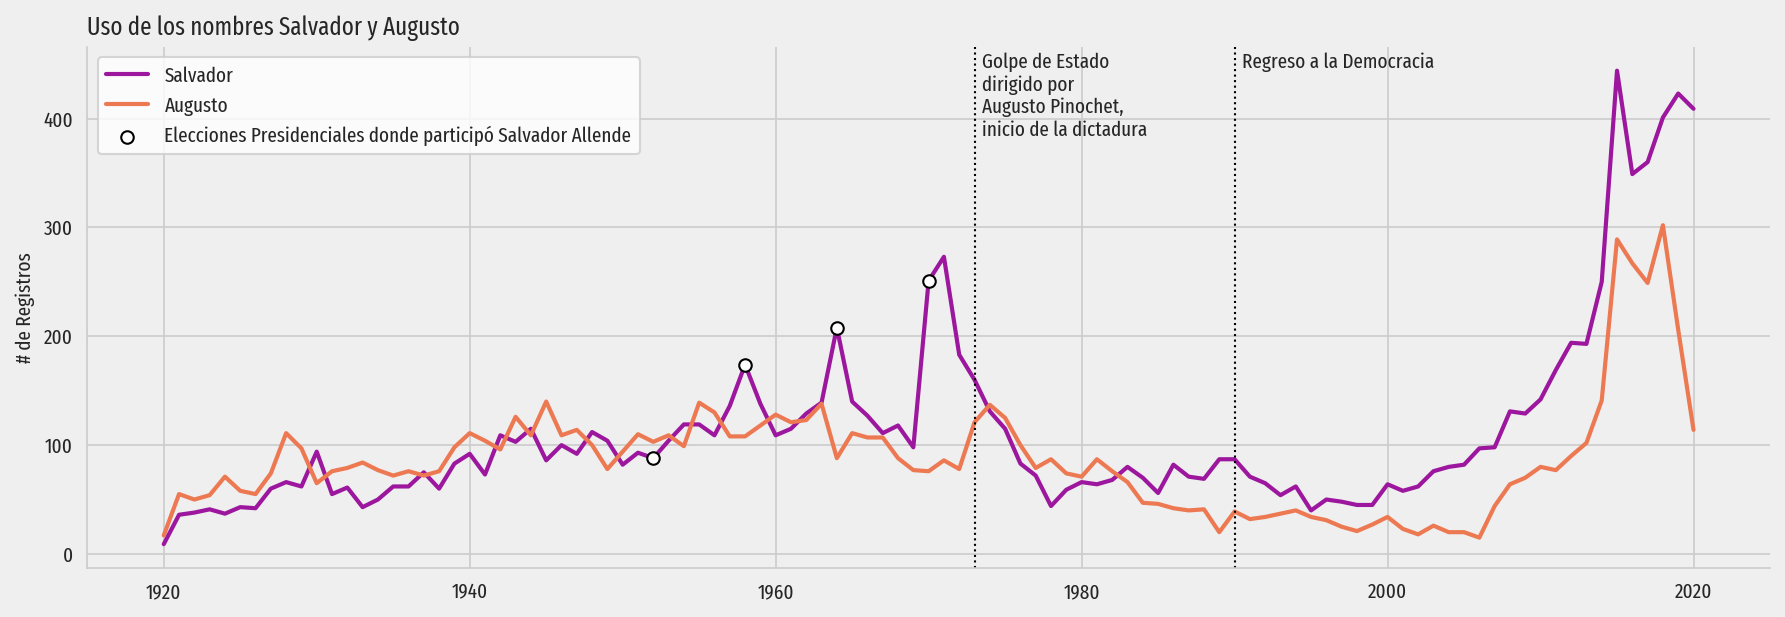

In [8]:
def plot_nameseries(names):

    fig, ax = plt.subplots(figsize=(12, 4))

    names.plot(
        ax=ax,
        color=sns.color_palette("plasma", n_colors=len(names.columns)),
        linewidth=2,
    )

    fig.set_facecolor("#efefef")
    ax.set_facecolor("#efefef")
    sns.despine(ax=ax)

    ax.set_xlabel("")
    ax.set_ylabel("# de Registros")

    fig.tight_layout()

    return fig, ax


fig, ax = plot_nameseries(tabla_anual[["Salvador", "Augusto"]])

ax.axvline(1973, linestyle="dotted", linewidth=1, color="black")
ax.annotate(
    "Golpe de Estado\ndirigido por\nAugusto Pinochet,\ninicio de la dictadura",
    xy=(1973.5, 0.99),
    xycoords=("data", "axes fraction"),
    ha="left",
    va="top",
)

ax.axvline(1990, linestyle="dotted", linewidth=1, color="black")
ax.annotate(
    "Regreso a la Democracia",
    xy=(1990.5, 0.99),
    xycoords=("data", "axes fraction"),
    ha="left",
    va="top",
)

ax.scatter(
    [1952, 1958, 1964, 1970],
    tabla_anual.loc[[1952, 1958, 1964, 1970], "Salvador"],
    color="white",
    edgecolor="black",
    label="Elecciones Presidenciales donde participó Salvador Allende",
    zorder=5,
)

ax.legend()
ax.set_title("Uso de los nombres Salvador y Augusto", loc="left")


Text(0.0, 1.0, 'Los nombres de Romané (TVN, 2000)')

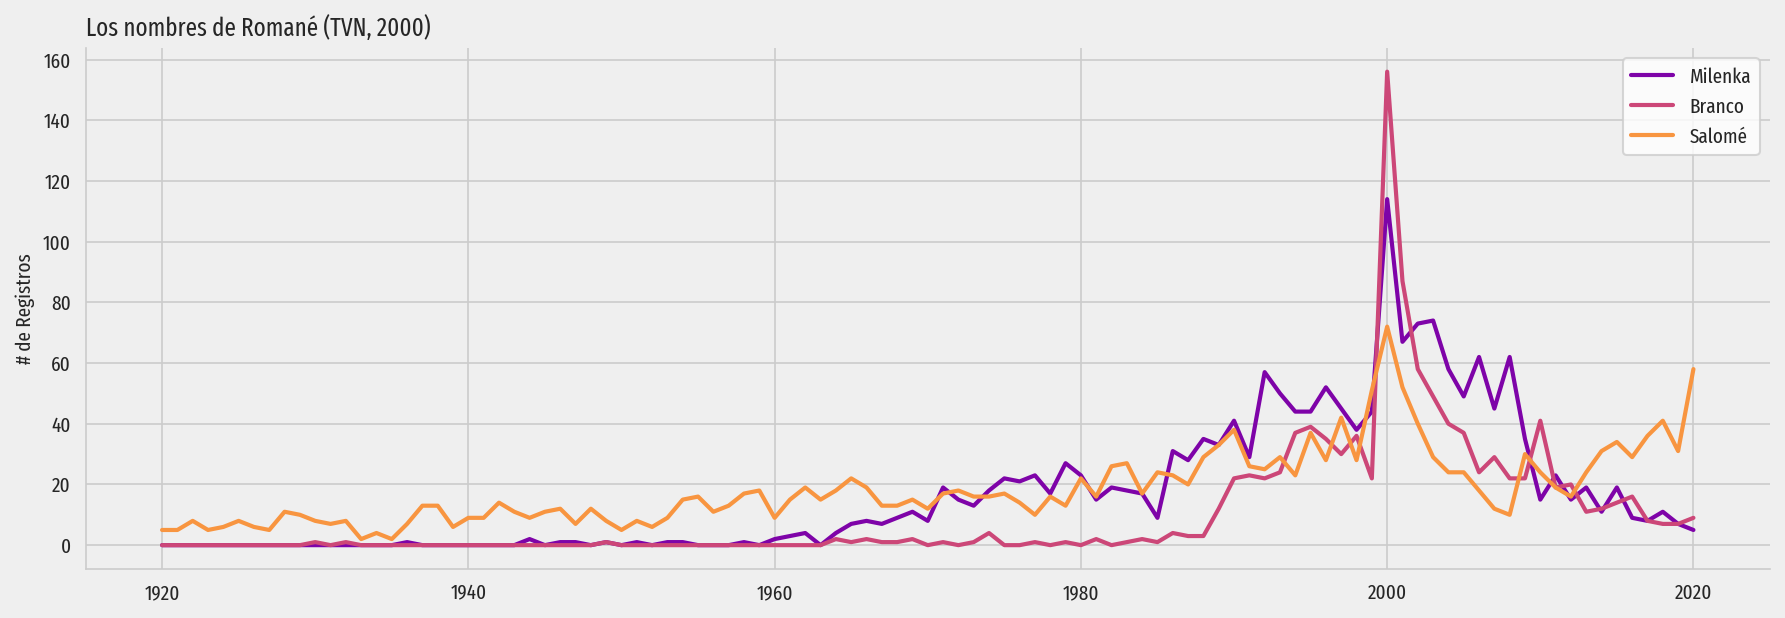

In [9]:
fig, ax = plot_nameseries(tabla_anual[["Milenka", "Branco", "Salomé"]].fillna(0))

ax.set_title("Los nombres de Romané (TVN, 2000)", loc="left")


Text(0.0, 1.0, "Everybody (Backstreet's Back)")

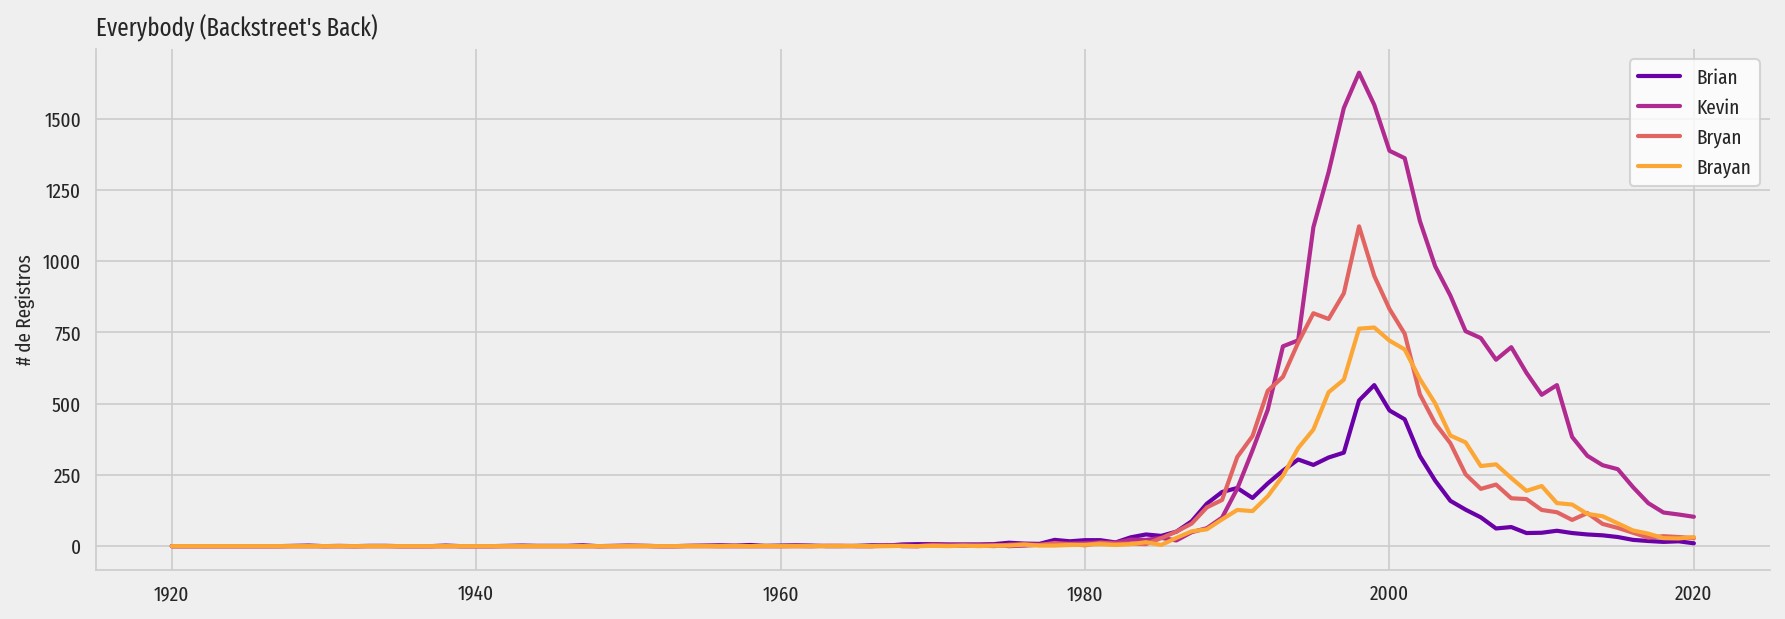

In [10]:
fig, ax = plot_nameseries(tabla_anual[["Brian", "Kevin", "Bryan", "Brayan"]].fillna(0))
ax.set_title("Everybody (Backstreet's Back)", loc="left")


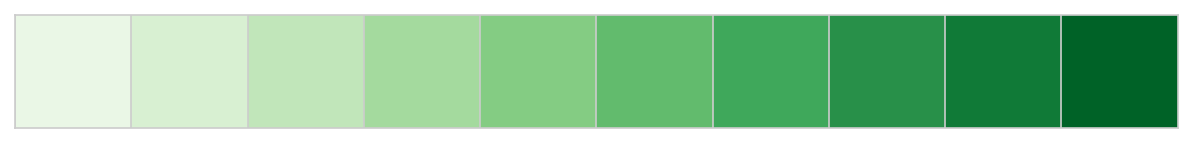

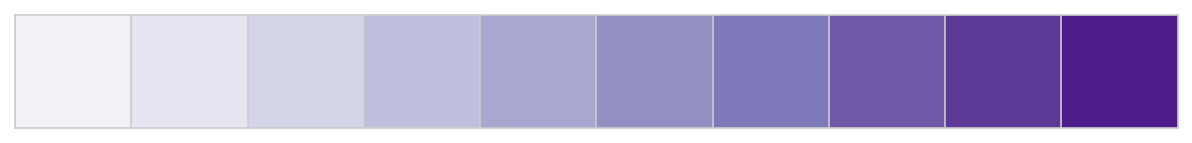

In [11]:
import numpy as np
from aves.visualization.tables.areas import streamgraph
from matplotlib.colors import rgb2hex

n_name_bins = 10

name_bin = pd.cut(np.log(total_n), n_name_bins, labels=False)
m_colors = list(map(rgb2hex, sns.color_palette("Greens", n_colors=n_name_bins)))
f_colors = list(map(rgb2hex, sns.color_palette("Purples", n_colors=n_name_bins)))

name_to_color = (
    guaguas.groupby(["nombre", "sexo"])["n"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
    .drop_duplicates(subset=["nombre"])
    .set_index("nombre")["sexo"]
    .to_dict()
)

for k, v in name_to_color.items():
    if v == "M":
        name_to_color[k] = m_colors[name_bin[k]]
    elif v == "F":
        name_to_color[k] = f_colors[name_bin[k]]
    else:
        raise ValueError(k)

sns.palplot(m_colors)
sns.palplot(f_colors)
# name_to_color


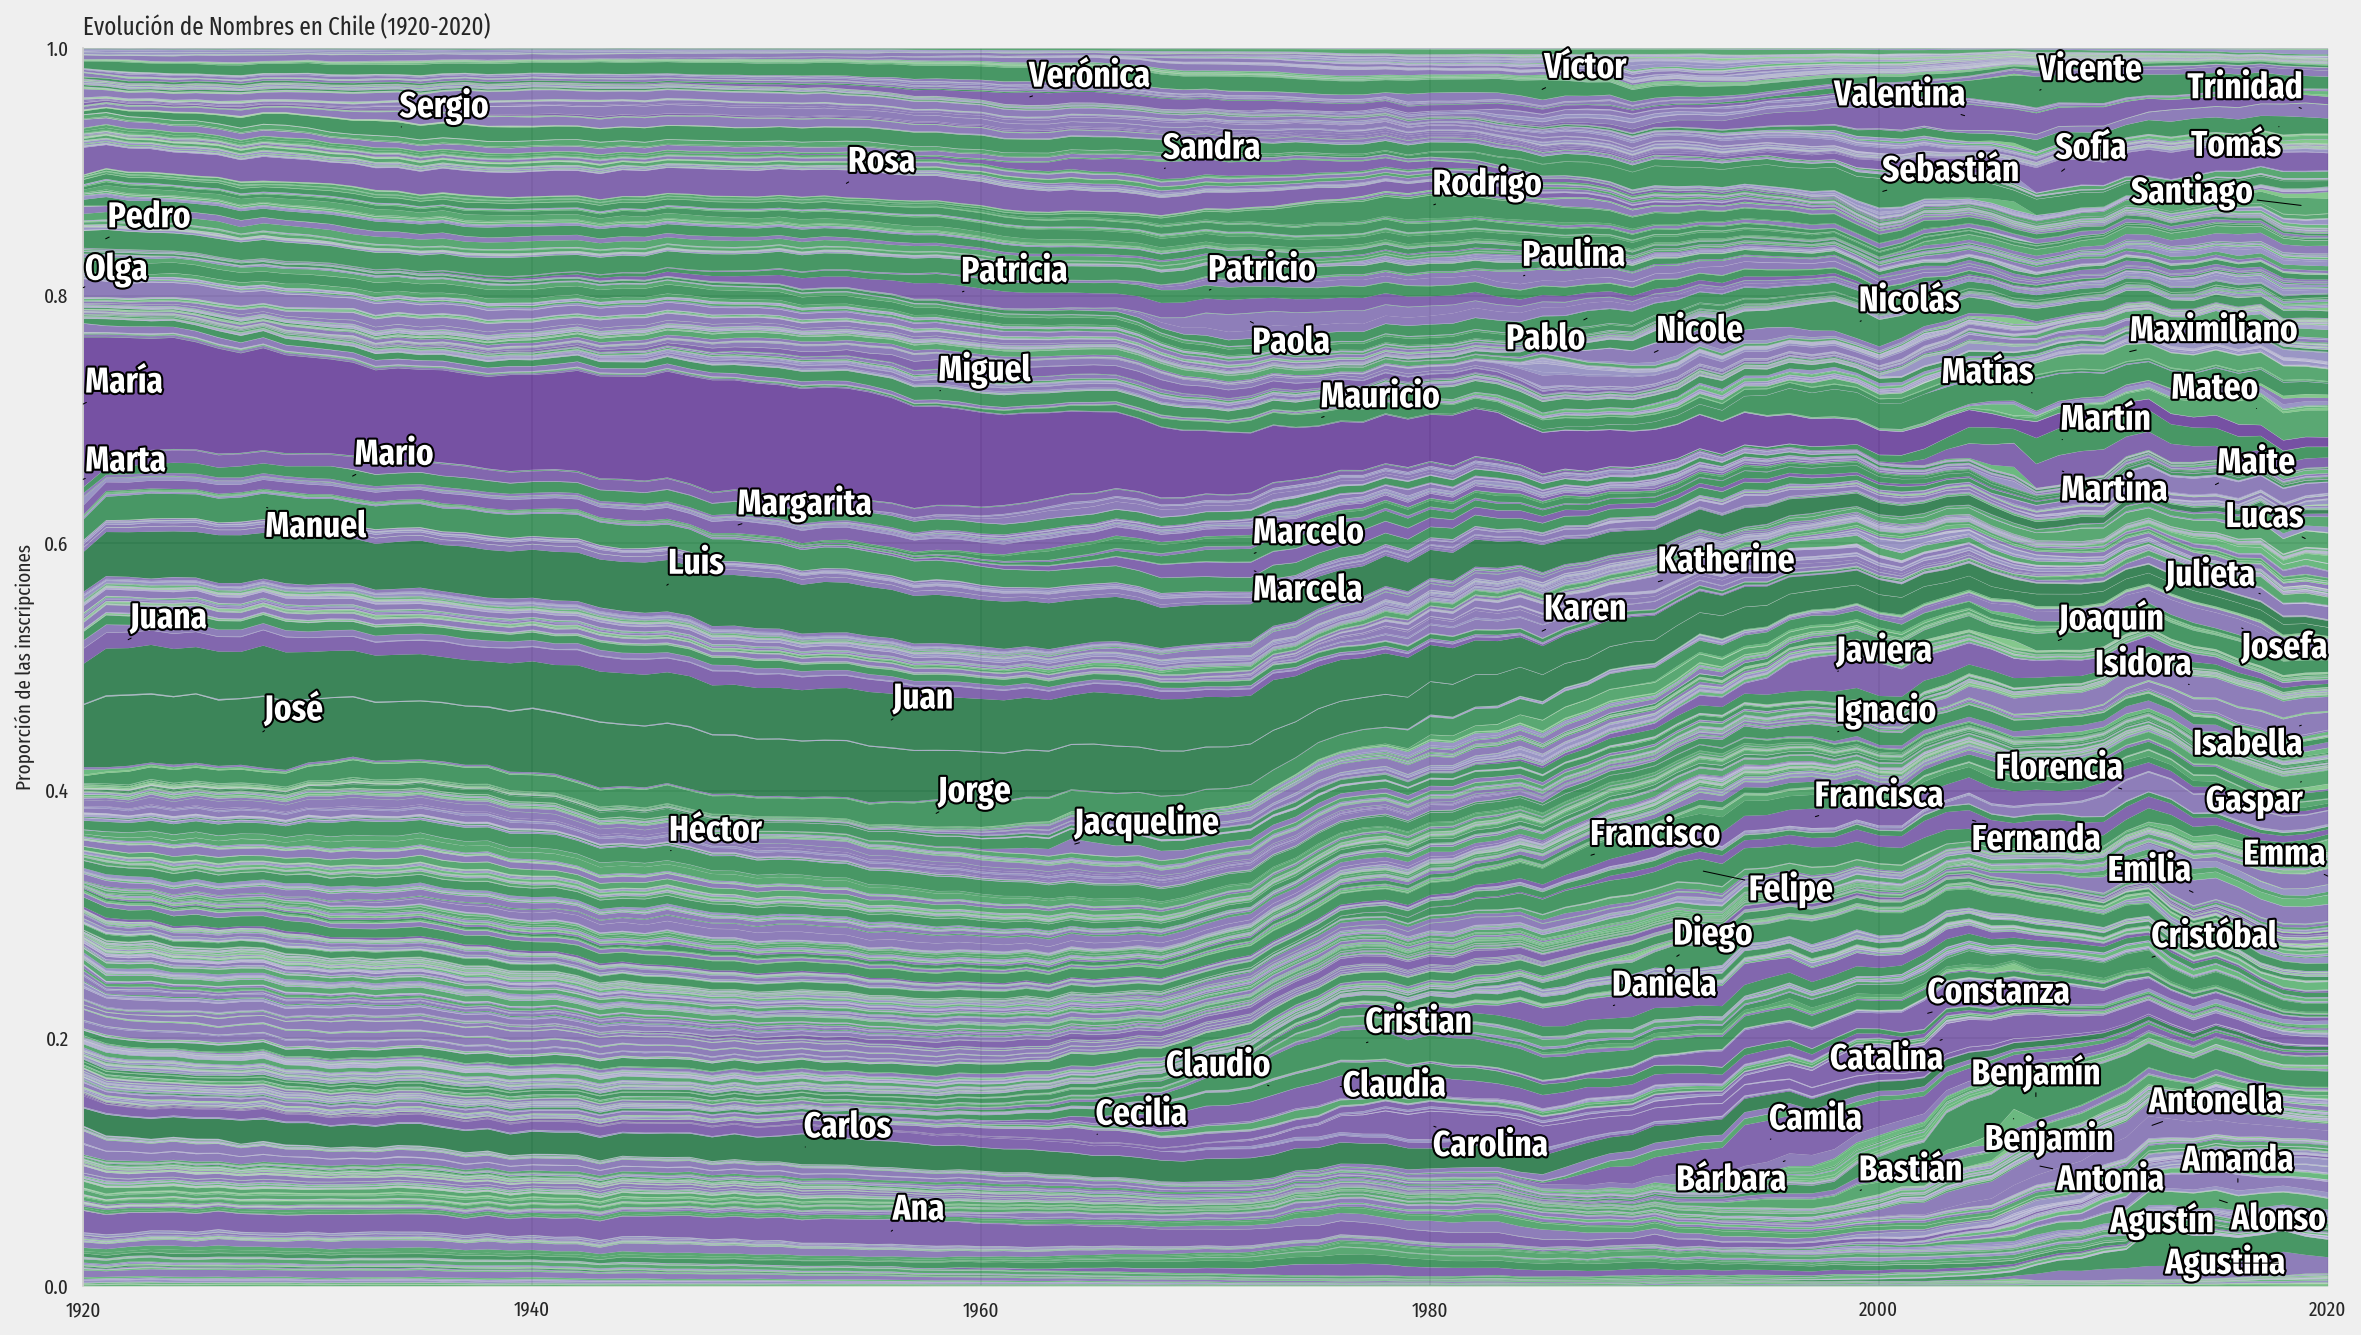

In [12]:
fig, ax = plt.subplots(figsize=(16, 9))

fig.set_facecolor("#efefef")
ax.set_facecolor("#efefef")
ax.set_xlim([1920, 2020])
ax.set_ylim([0, 1])
ax.set_title("Evolución de Nombres en Chile (1920-2020)", loc="left")
ax.set_ylabel("Proporción de las inscripciones")
ax.set_xlabel("")

streamgraph(
    ax,
    tabla_anual.fillna(0).pipe(normalize_rows),
    fig=fig,
    area_colors=name_to_color,
    baseline="zero",
    labels=True,
    label_threshold=0.01,
    avoid_label_collisions=True,
    area_args=dict(linewidth=0, alpha=0.75),
)


sns.despine(ax=ax, bottom=True, top=True)


In [13]:
from scipy.stats import entropy

tabla_entropia = (
    tabla_anual[total_n[total_n > 5000].index]
    .fillna(0)
    .apply(entropy)
    .sort_values(ascending=False)
)

tabla_entropia


Ismael      4.563372
Laura       4.554223
Octavio     4.553646
Exequiel    4.547314
Elisa       4.543866
              ...   
Facundo     2.771313
Isabella    2.707755
Mia         2.673092
Matias      2.548571
Benjamin    2.199309
Length: 524, dtype: float64

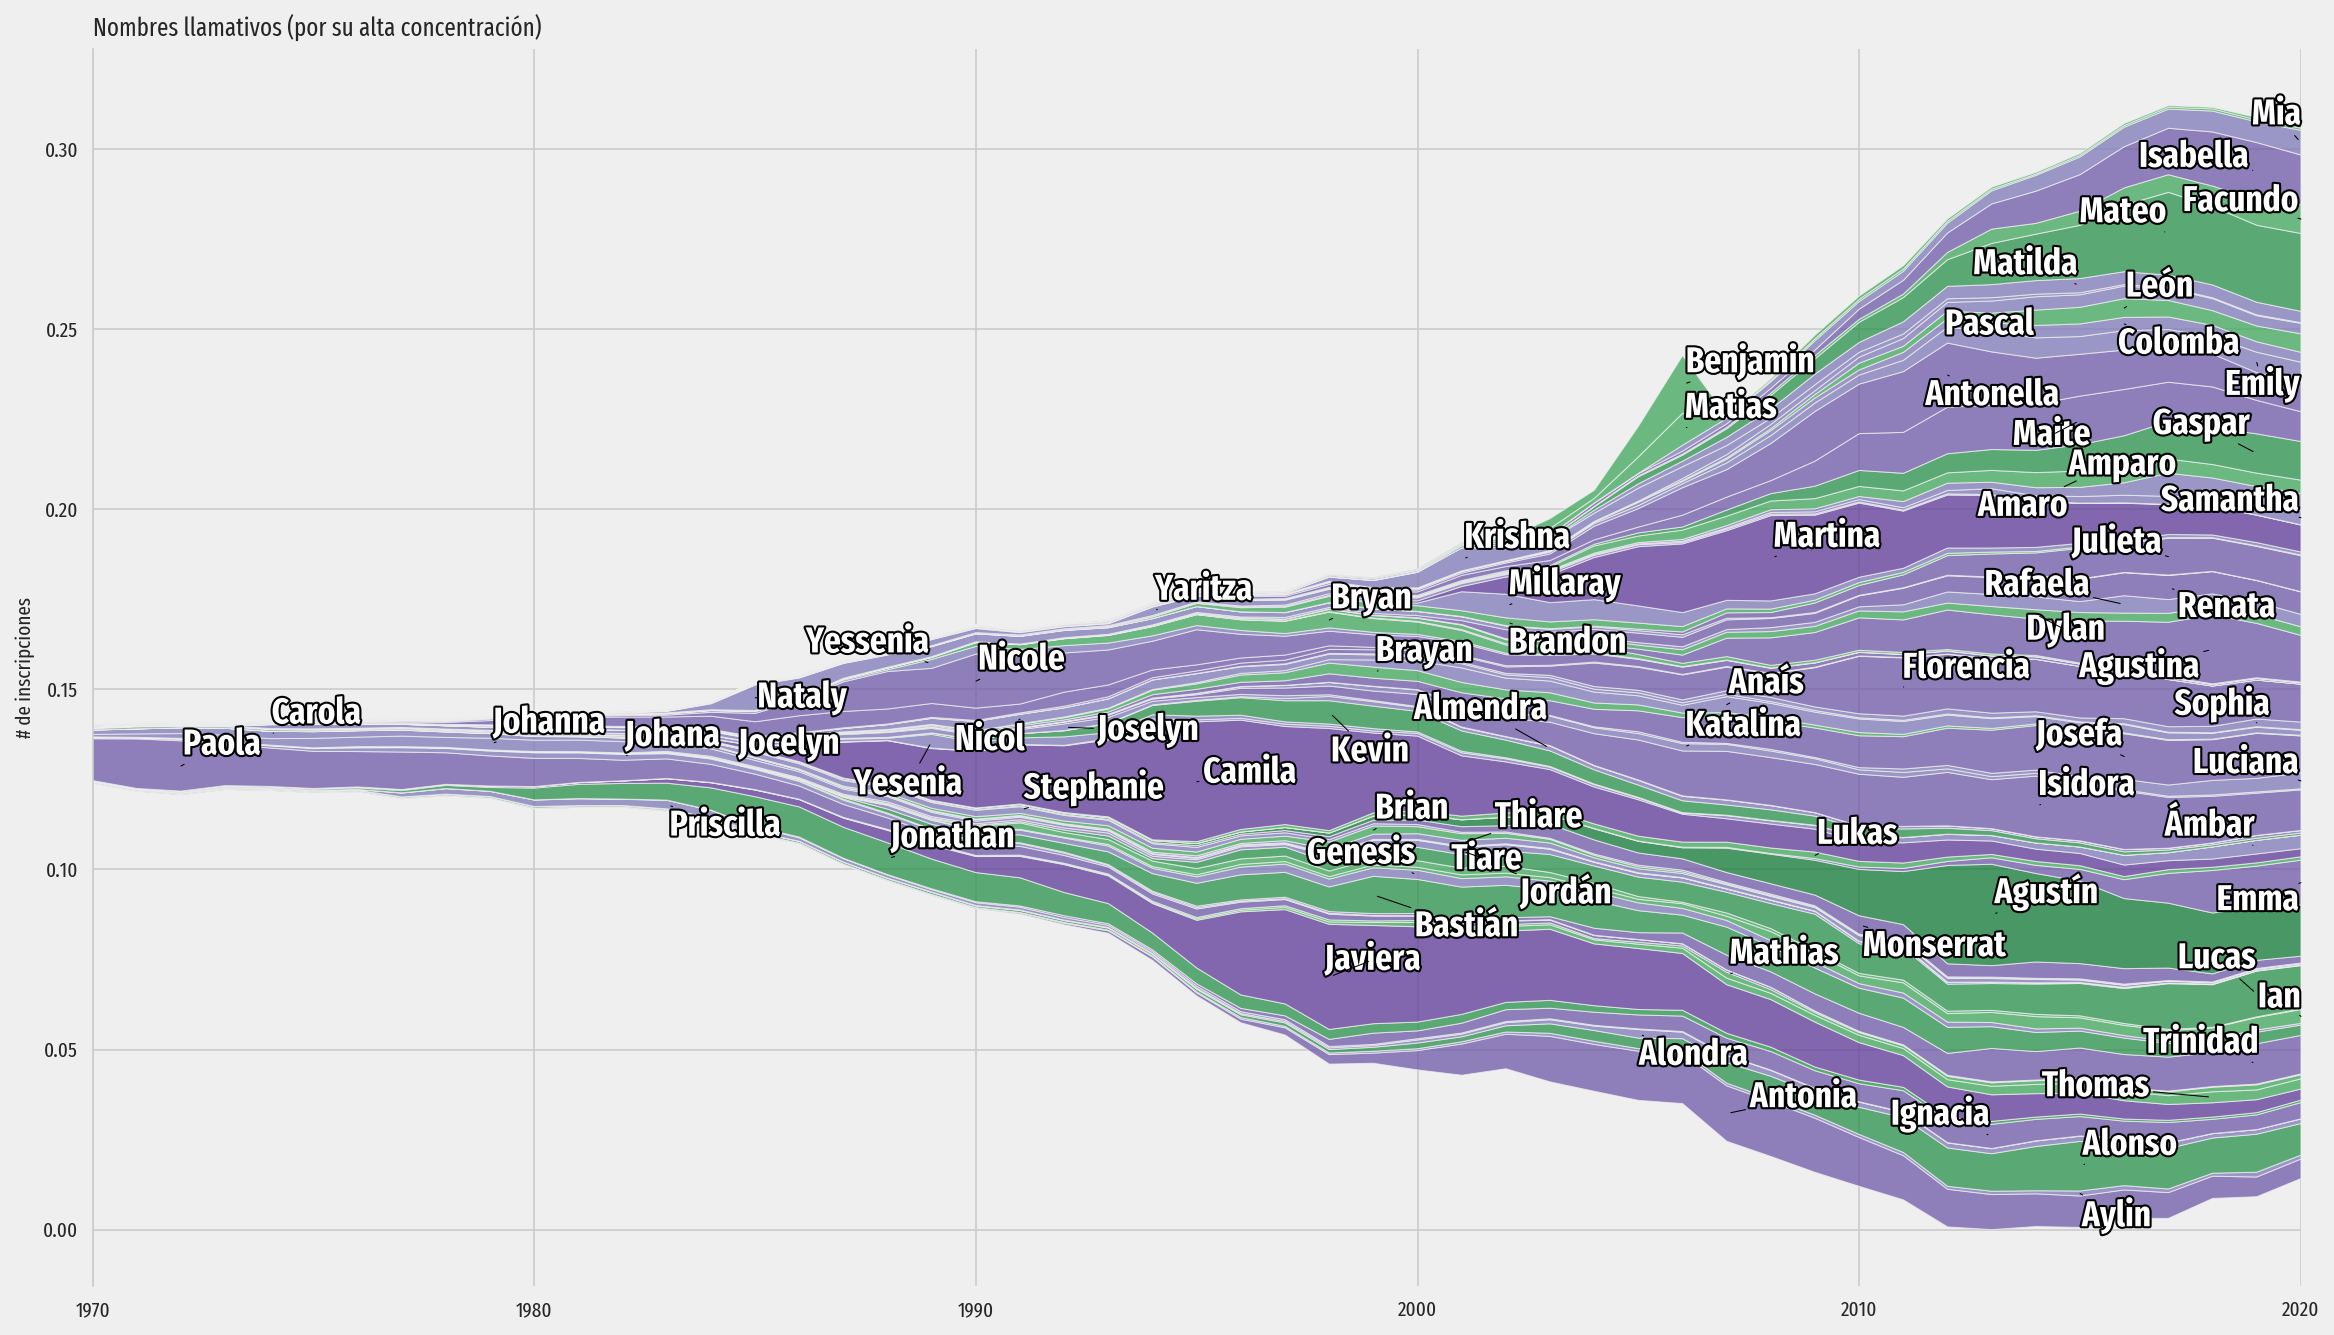

In [14]:
fig, ax = plt.subplots(figsize=(16, 9))

fig.set_facecolor("#efefef")
ax.set_facecolor("#efefef")
ax.set_xlim([1970, 2020])
ax.set_title('Nombres llamativos (por su alta concentración)', loc='left')
ax.set_ylabel('# de inscripciones')
ax.set_xlabel('')

streamgraph(
    ax,
    tabla_anual.pipe(normalize_rows)[tabla_entropia.tail(75).index],
    fig=fig,
    area_colors=name_to_color,
    area_args=dict(edgecolor="#efefef", linewidth=0.5, alpha=0.75),
    avoid_label_collisions=True,
)

sns.despine(ax=ax, bottom=True, top=True)


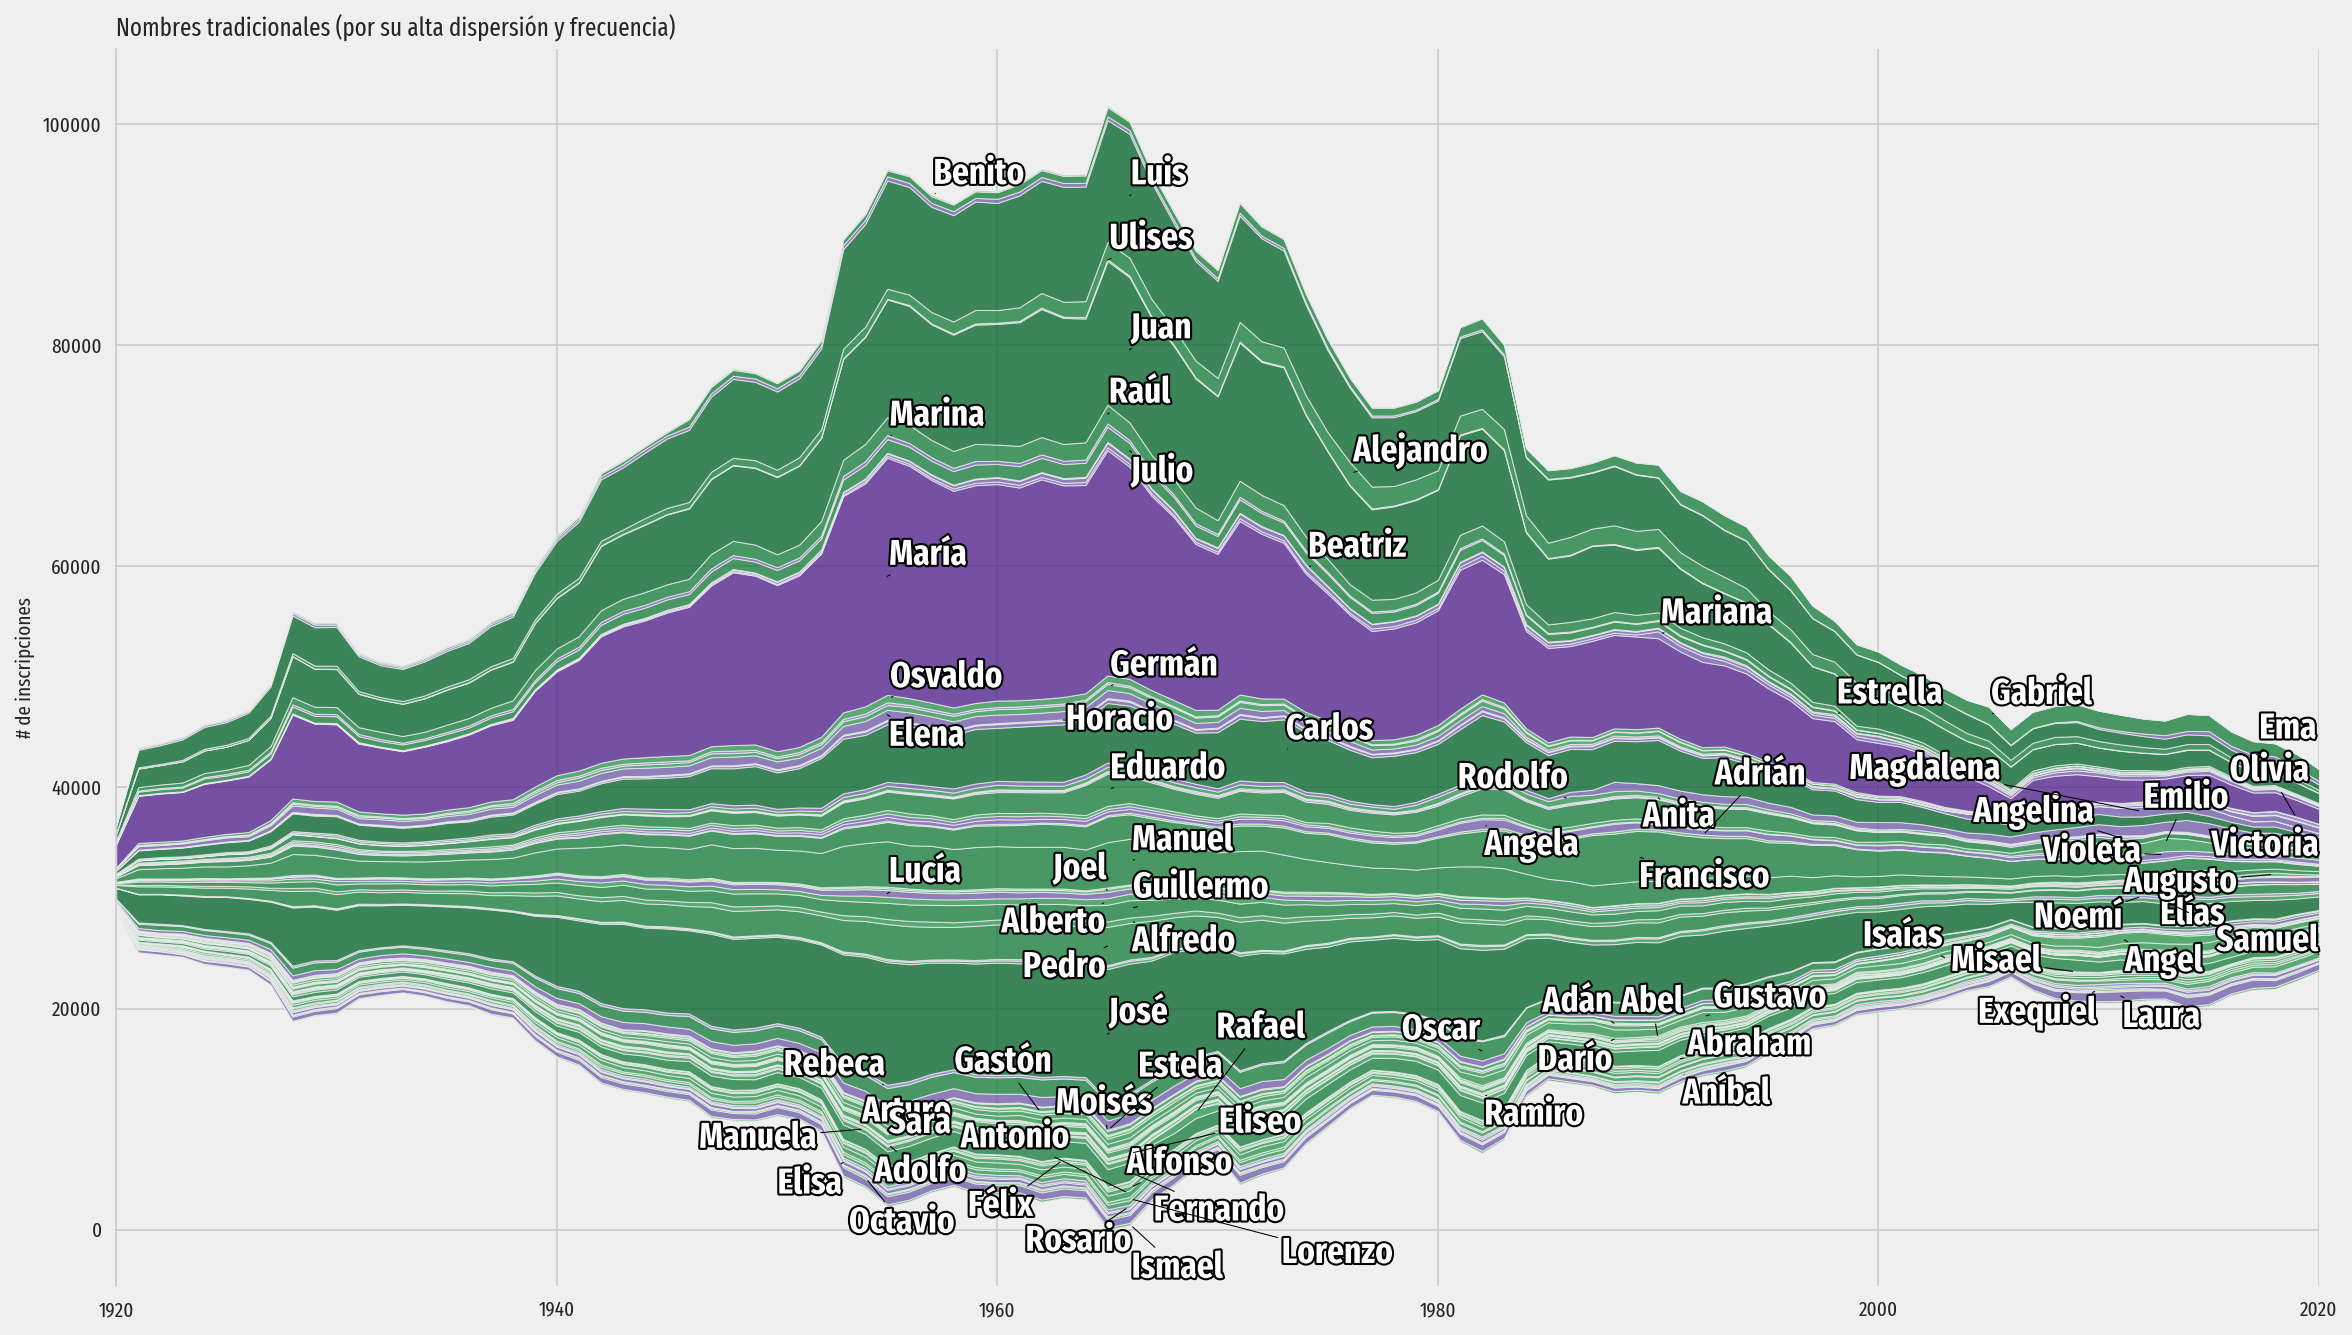

In [15]:
fig, ax = plt.subplots(figsize=(16, 9))

fig.set_facecolor("#efefef")
ax.set_facecolor("#efefef")
ax.set_xlim([1920, 2020])
ax.set_title('Nombres tradicionales (por su alta dispersión y frecuencia)', loc='left')
ax.set_ylabel('# de inscripciones')
ax.set_xlabel('')

streamgraph(
    ax,
    tabla_anual[tabla_entropia.head(75).index],
    fig=fig,
    area_colors=name_to_color,
    area_args=dict(edgecolor="#efefef", linewidth=0.5, alpha=0.75),
    avoid_label_collisions=True,
)

sns.despine(ax=ax, bottom=True, top=True)


In [16]:
unisex_names = (
    pd.pivot_table(guaguas, index="nombre", columns="sexo", values="n", aggfunc="sum")
    .join(total_n)
    .fillna(0)
    .assign(mult=lambda x: x["F"] * x["M"])
    .pipe(lambda x: x[(x["mult"] > 0) & (x["n"] > 50)])
    .drop(["mult", "n"], axis=1)
    .pipe(tfidf)
    .pipe(lambda x: x[x["F"].between(0.02, 0.98)])
    .join(total_n)
)

unisex_names.sample(15)


F         M      n
nombre                              
Xiao       0.622951  0.377049     61
Cristin    0.857143  0.142857     56
Eden       0.458333  0.541667    144
Carol      0.978413  0.021587  11118
Nadin      0.587302  0.412698     63
Ladis      0.933333  0.066667     60
York       0.055556  0.944444     54
Gabrielle  0.808081  0.191919     99
Jocsan     0.089202  0.910798    213
Dany       0.151856  0.848144    889
Demi       0.900000  0.100000     70
Grey       0.977273  0.022727    176
Govinda    0.936709  0.063291     79
Quimey     0.593220  0.406780     59
Santo      0.104762  0.895238    105

<AxesSubplot:ylabel='Frequency'>

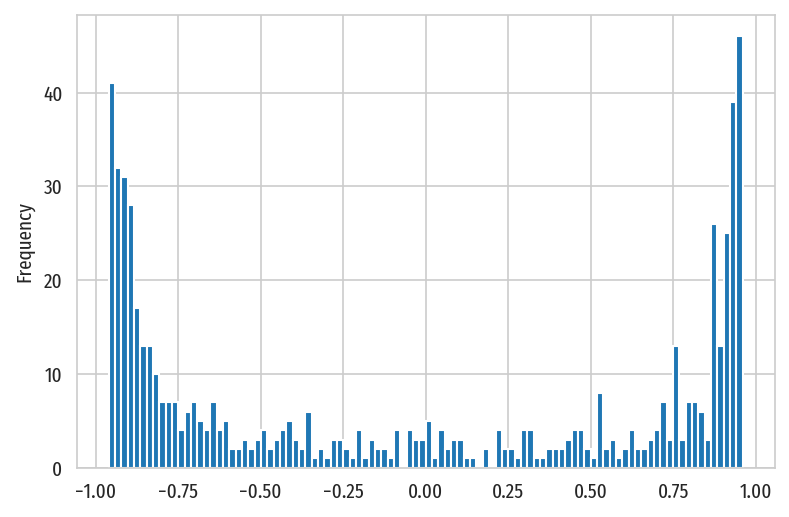

In [17]:
unisex_names["tendency"] = unisex_names["F"] - unisex_names["M"]
unisex_names["tendency"].plot(kind="hist", bins=100)


In [18]:
from aves.visualization.tables.bubbles import bubble_plot

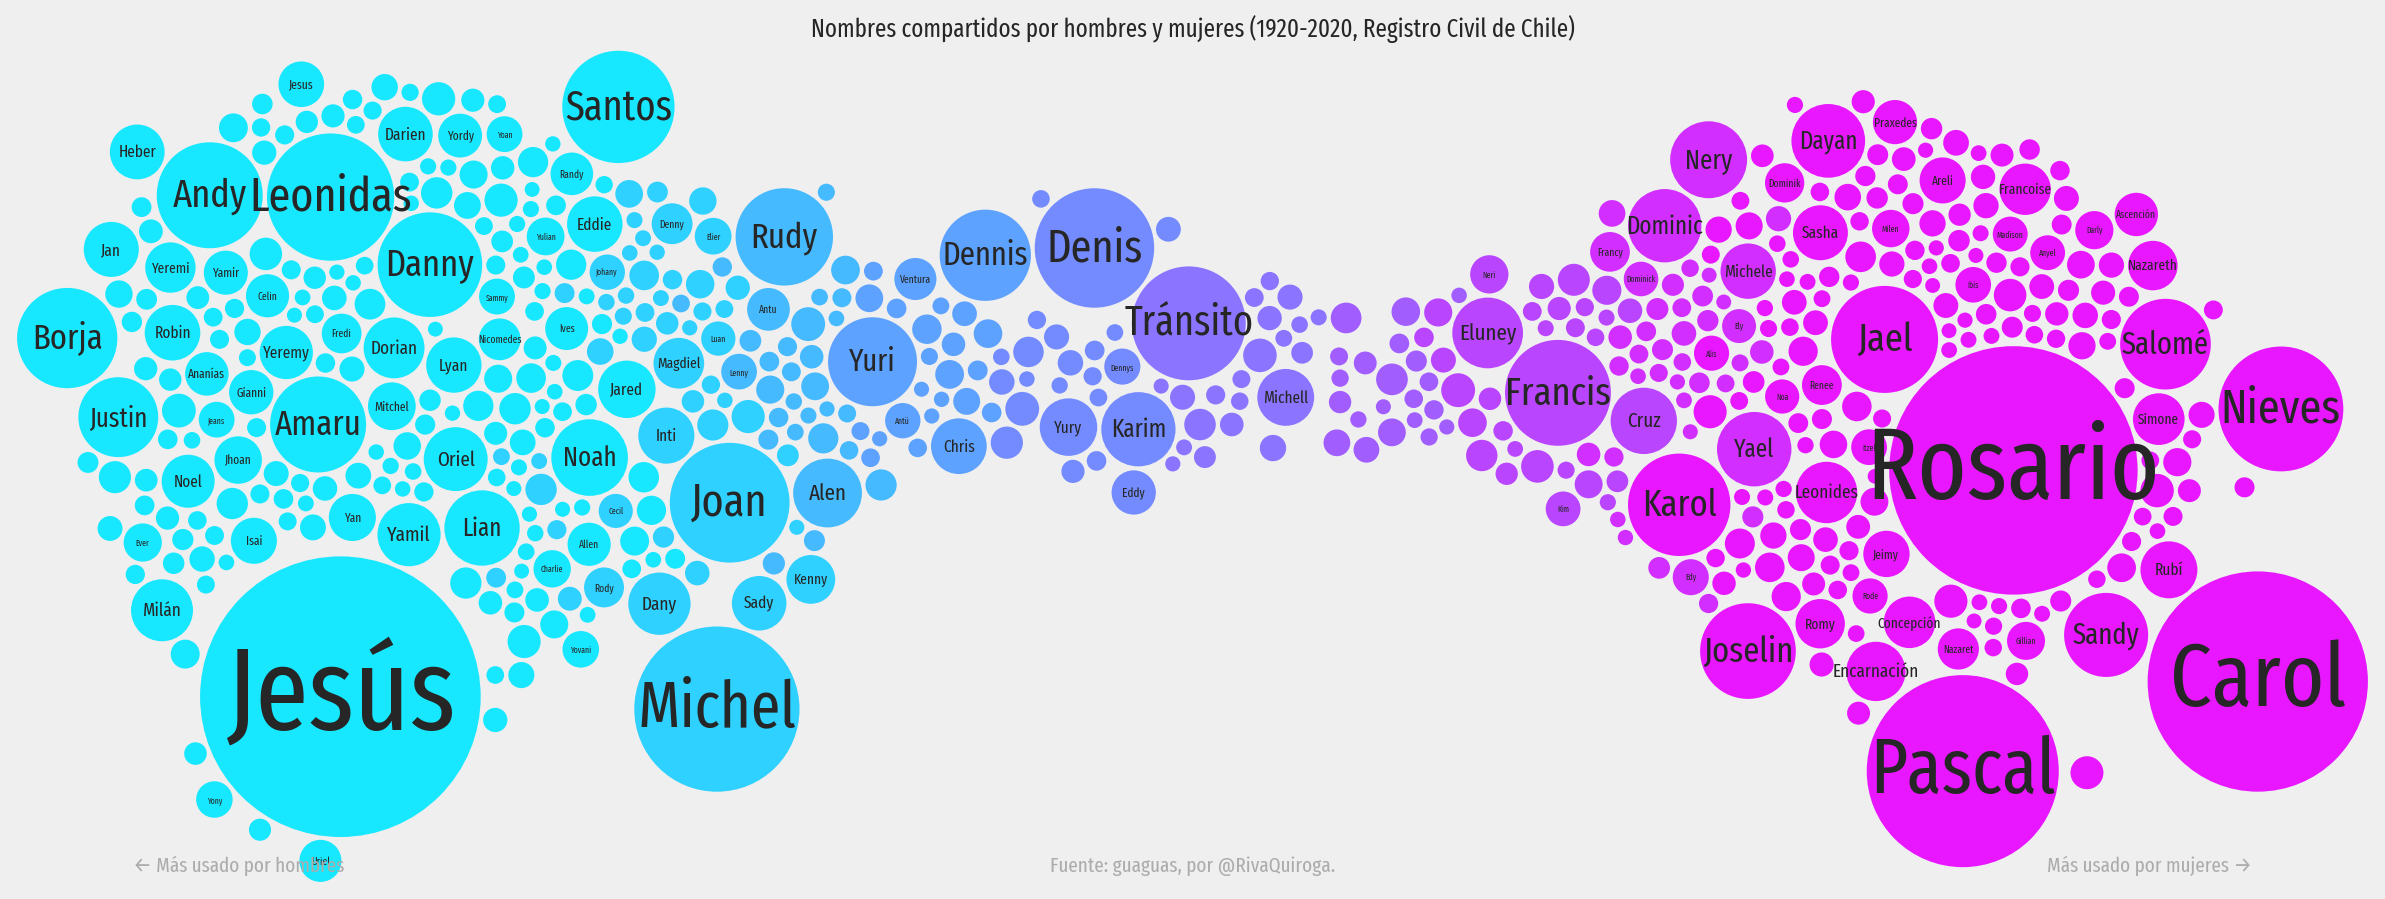

In [19]:
fig, ax = plt.subplots(figsize=(16, 9))

bubble_plot(
    ax,
    unisex_names.reset_index(),
    "tendency",
    "n",
    label_column="nombre",
    palette="cool",
    max_label_size=56,
    starting_y_range=60, margin=2
)

ax.set_axis_off()
ax.set_title(
    "Nombres compartidos por hombres y mujeres (1920-2020, Registro Civil de Chile)"
)
ax.annotate(
    "Más usado por mujeres →",
    (0.95, 0.01),
    xycoords="axes fraction",
    ha="right",
    va="bottom",
    fontsize="medium",
    color="#abacab",
)
ax.annotate(
    "← Más usado por hombres",
    (0.05, 0.01),
    xycoords="axes fraction",
    ha="left",
    va="bottom",
    fontsize="medium",
    color="#abacab",
)
ax.annotate(
    "Fuente: guaguas, por @RivaQuiroga.",
    (0.5, 0.01),
    xycoords="axes fraction",
    ha="center",
    va="bottom",
    fontsize="medium",
    color="#abacab",
)

fig.set_facecolor("#efefef")
fig.tight_layout()
